<a href="https://colab.research.google.com/github/jafr0822/MNA_ProyectoIntegrador-Equipo7/blob/main/Equipo7_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Integrador
## Tecnológico de Monterrey
### Maestría en Inteligencia Artificial Aplicada (MNA)
#### Avance 1
#### Equipo 7
* Jorge Arturo Federico Rivera – A01250724
* Marco Antonio Vázquez Morales – A01793704
* Alejandro Jesús Vázquez Navarro - A01793146

Proyecto:

*Modelo clasificador de multimorbilidad maternal y predictor de desenlaces perinatales a partir de datos clínicos metabólicos, genéticos y nutricionales de mujeres mexicanas*

05 de mayo de 2024

# Introducción


### Este trabajo tiene como finalidad crear un modelo que pueda predecir el riesgo de sufrir alguna afectación a la mujer o su feto en el proceso de embarazo, tomando como base los datos clínicos, metabólicos, genéticos y nutricionales. Se trata de encontrar una variable dependiente que permita detectar las emfermedades a tiempo para poder reducir el impacto negativo que puediera tener en uno o ambos casos.

### En primer termino se enlistan las variabales que se van a utilizar, en esta étapa identificamos 99 en donde las que estan en color naranja representan las posibles variables dependendientes, las que estan en azul son las variables explicativas, las que estan en color rojo serían las variables de salida.

### Posteriormente realizamos una revisión a los datos, luego quitamos las columnas que no serán útiles para después realizar un análisis exploratorio de los datos utilizando ydata-profilling y Sweetviz.

### Debido al número extenso de variables (96) generamos reportes estáticos en html para su mejor visualización.

### Estos pueden consultarse en estas ligas:
- [Reporte mínimo exploratorio](https://github.com/jafr0822/MNA_ProyectoIntegrador-Equipo7/blob/8a9e4300831ede90791258bd5b58acd44c456537/data/reports/profile1_min_report.html)

- [Reporte completo exploratorio](https://github.com/jafr0822/MNA_ProyectoIntegrador-Equipo7/blob/8a9e4300831ede90791258bd5b58acd44c456537/data/reports/profile1_exp_report.html)

- [Reporte realizado con sweetViz](https://github.com/jafr0822/MNA_ProyectoIntegrador-Equipo7/blob/8a9e4300831ede90791258bd5b58acd44c456537/data/reports/sv_report1.html)


# Estructura de datos

Despúes de una revisión con la parte médica, definimos las siguientes variables como la estrucutura base para la generación de los modelos predicitivos.
A continuación se listan y describen las variables que serán utilizadas para este proyecto.

Las variables en rojo serán consolidadas para la creación de la variable dependiente llamada `IndexMorbilidad`
En un principio la variable dependiente candidata (en marrón) era `sdg_parto`, se descartó debido a que solo está presente en el 50.5%  de las observaciones pero se incluirá como uyna nueva variable llamada `prematurez` sí | no.

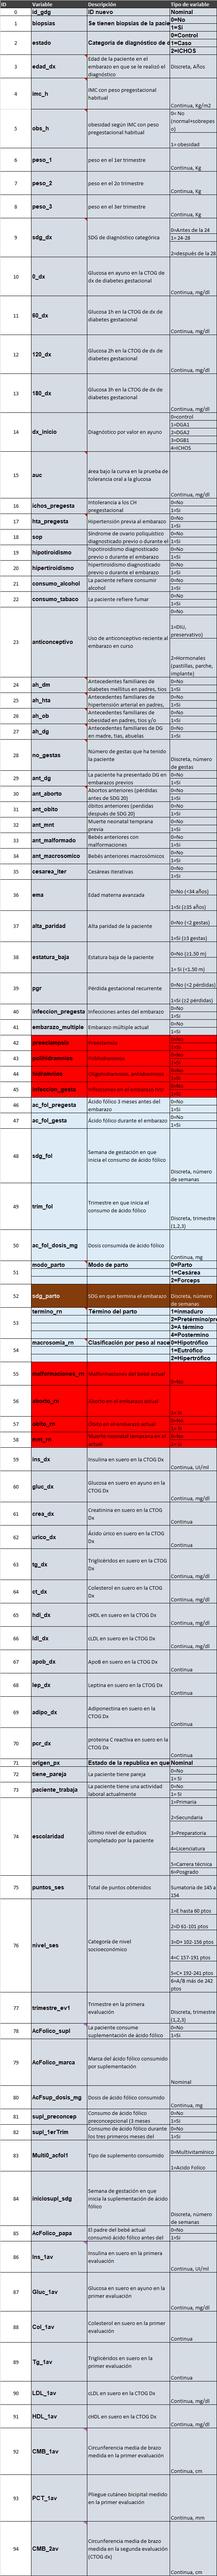


### Install libraries for Colab

In [25]:
#%pip install matplotlib-venn missingno sweetviz ydata-profiling
#%pip install --upgrade Pillow
#%pip install --upgrade scikit-learn
#%pip install git+https://github.com/MIDASverse/MIDASpy.git

import importlib

# List of libraries to install
libraries_to_install = [
    ("matplotlib_venn", "matplotlib_venn"),
    ("missingno", "missingno"),
    ("sweetviz", "sweetviz"),
    ("ydata_profiling", "pandas_profiling"),
    ("Pillow", "PIL"),
    ("scikit-learn", "sklearn"),
]

for package, module in libraries_to_install:
    try:
        importlib.import_module(module)
        print(f"{module} is already installed.")
    except ImportError:
        print(f"Installing {module}...")
        %pip install {package}


matplotlib_venn is already installed.
missingno is already installed.
sweetviz is already installed.
pandas_profiling is already installed.
PIL is already installed.
sklearn is already installed.


### Import libraries

In [26]:
import pandas as pd
import sweetviz as sv
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns

# CREATE REPORTS
_BLN_REPORTS = False

# Funciones ad hoc

In [27]:

# Creamos una función para calcular y graficar la porosidad del dataframe
def getPorosidad(df):

  porosidad = df.isnull().sum() / len(df)

  porosidad_df = pd.DataFrame({
      'Caracteristica': porosidad.index,
      'Porosidad': porosidad.values
  })

  # Ordenar el DataFrame por porosidad de mayor a menor
  porosidad_df = porosidad_df.sort_values(by='Porosidad', ascending=True)
  # Crear la gráfica de barras
  plt.figure(figsize=(6, 14))
  variables_interes = ['sdg_parto', 'preeclampsia', 'polihidramnios', 'hidramnios', 'infeccion_gesta', 'malformaciones_rn', 'aborto_rn', 'obito_rn', 'mnt_rn']

  colors = ['skyblue' if x not in variables_interes else 'orange' for x in porosidad_df['Caracteristica']]

  bars = plt.barh(porosidad_df['Caracteristica'], porosidad_df['Porosidad'], color=colors)  # Use barh for horizontal bars

  # Add value at the end of each bar
  for bar, value in zip(bars, porosidad_df['Porosidad']):
      plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f"{value:.2%}", va='center', ha='left')

  plt.xlabel('% Porosidad')
  plt.ylabel('Caracteristica')
  plt.title('Porosidad por Columna')
  plt.xticks(rotation=90, ha='right')
  plt.tight_layout()
  plt.show()

def getPorosidadQuintiles(df):

    porosidad = df.isnull().sum() / len(df)
    porosidad_df = pd.DataFrame({
        'Caracteristica': porosidad.index,
        'Porosidad': porosidad.values
    })

    # Ordenar el DataFrame por porosidad de mayor a menor
    porosidad_df = porosidad_df.sort_values(by='Porosidad', ascending=True)

    # Crear la gráfica de barras
    plt.figure(figsize=(6, 14))

    variables_interes = ['sdg_parto', 'preeclampsia', 'polihidramnios', 'hidramnios', 'infeccion_gesta', 'malformaciones_rn', 'aborto_rn', 'obito_rn', 'mnt_rn']
    colors = ['skyblue' if x not in variables_interes else 'orange' for x in porosidad_df['Caracteristica']]

    bars = plt.barh(porosidad_df['Caracteristica'], porosidad_df['Porosidad'], color=colors)  # Use barh for horizontal bars

    # Add value at the end of each bar
    for bar, value in zip(bars, porosidad_df['Porosidad']):
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f"{value:.2%}", va='center', ha='left')

    # Añadir marcadores para los quintiles
    quintiles = porosidad_df['Porosidad'].quantile([0.2, 0.4, 0.6, 0.8])
    for quintile in quintiles:
        plt.axvline(x=quintile, color='red', linestyle='--', alpha=0.5)

    plt.xlabel('% Porosidad')
    plt.ylabel('Caracteristica')
    plt.title('Porosidad por Columna')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

#####################################################

def getVariablesUltimoQuintil(df):
    porosidad = df.isnull().sum() / len(df)
    porosidad_df = pd.DataFrame({
        'Caracteristica': porosidad.index,
        'Porosidad': porosidad.values
    })

    # Ordenar el DataFrame por porosidad de mayor a menor
    porosidad_df = porosidad_df.sort_values(by='Porosidad', ascending=True)

    # Calcular los quintiles de la porosidad
    quintiles = porosidad_df['Porosidad'].quantile([0.2, 0.4, 0.6, 0.8])

    # Filtrar características que están en el último quintil
    ult_quintil = porosidad_df[porosidad_df['Porosidad'] > quintiles[0.8]]

    return ult_quintil['Caracteristica'].tolist()

########################################################

# Creamos una función para separar las variables categóricas, numéricas
def extract_column_types(df):
    numeric_cols = []
    string_cols = []

    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            numeric_cols.append(col)
        elif df[col].dtype == 'object':
            string_cols.append(col)

    return numeric_cols, string_cols


########################################################

def plot_distribution(df):
    # Extraer columnas numéricas
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Calcular el número de filas y columnas para el mosaico
    num_cols = len(numeric_cols)
    num_rows = (num_cols + 1) // 2  # Redondeo hacia arriba

    # Crear una cuadrícula de subgráficos
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 6))
    axes = axes.flatten()  # Convertir la matriz de ejes en una lista plana

    # Iterar sobre cada columna numérica y crear una gráfica de distribución
    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], kde=True, color='skyblue', ax=axes[i])
        axes[i].set_title(f'Distribución de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')

    # Ocultar ejes sobrantes
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

#######################################

def get_column_types(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    string_cols = df.select_dtypes(include=[object]).columns.tolist()
    #binary_cols = [col for col in df.columns if col not in numeric_cols and col not in string_cols]
    return numeric_cols, string_cols

#######################################

def identify_binary(data):

  binary_cols = []
  for col in data.columns:
    unique_values = data[col].dropna().unique()
    #print(f'Col name {col} unique values {unique_values}')

    if len(unique_values) == 3 and (set(unique_values) == {"", 0.0, 1.0}):  # Check for 0, 1 or "", 1

      binary_cols.append(col)
  return binary_cols


def detect_outliers_iqr(df):
    outliers = []
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers.extend(col_outliers)
    return list(set(outliers))



### Read data from Excel databases

#### base_multimorb_fase1_fase_2_clinicas_originales.xlsx

In [49]:
# Se agrega esta configuración para mostrar todas las variables en el método describe.().T
pd.options.display.max_columns = None


cols_to_include = [
    "id_gdg",
"biopsias",
"estado",
"edad_dx",
"imc_h",
"obs_h",
"peso_1",
"peso_2",
"peso_3",
"sdg_dx",
"gluc_dx_0",
"gluc_dx_60",
"gluc_dx_120",
"gluc_dx_180",
"dx_inicio",
"auc",
"ichos_pregesta",
"hta_pregesta",
"sop",
"hipotiroidismo",
"hipertiroidismo",
"consumo_alcohol",
"consumo_tabaco",
"anticonceptivo",
"ah_dm",
"ah_hta",
"ah_ob",
"ah_dg",
"no_gestas",
"ant_dg",
"ant_aborto",
"ant_obito",
"ant_mnt",
"ant_malformado",
"ant_macrosomico",
"cesarea_iter",
"ema",
"alta_paridad",
"estatura_baja",
"pgr",
"infeccion_pregesta",
"embarazo_multiple",
"preeclampsia",
"polihidramnios",
"hidramnios",
"infeccion_gesta",
"ac_fol_pregesta",
"ac_fol_gesta",
"sdg_fol",
"trim_fol",
"ac_fol_dosis_mg",
"modo_parto",
"sdg_parto",
"termino_rn",
"macrosomia_rn",
"malformaciones_rn",
"aborto_rn",
"obito_rn",
"mnt_rn",
"ins_dx",
"gluc_dx",
"crea_dx",
"urico_dx",
"tg_dx",
"ct_dx",
"hdl_dx",
"ldl_dx",
"apob_dx",
"lep_dx",
"adipo_dx",
"pcr_dx",
"origen_px",
"tiene_pareja",
"paciente_trabaja",
"escolaridad",
"puntos_ses",
"nivel_ses",
"trimestre_ev1",
"AcFolico_supl",
#"AcFolico_marca", # No tiene valor en este estudio
"AcFsup_dosis_mg",
"supl_preconcep",
"supl_1erTrim",
"Multi0_acfol1",
"iniciosupl_sdg",
"AcFolico_papa",
"Ins_1av",
"Gluc_1av",
"Col_1av",
"Tg_1av",
"LDL_1av",
"HDL_1av",
"CMB_1av",
"PCT_1av",
"CMB_2av",
"PCT_2av"


]

excel_file_1 = "data/base_multimorb_fase1_fase_2_clinicas_originales.xlsx"

df1_sheet1 = pd.read_excel(
    excel_file_1,
    sheet_name=0,
    usecols=cols_to_include,
)

df1_sheet2 = pd.read_excel(
    excel_file_1,
    sheet_name=1,
    usecols=cols_to_include,
)

df1_sheets = [
    df1_sheet1,
    df1_sheet2
]

df1 = pd.concat(df1_sheets)
df1.to_csv("primera_Salida.csv")
#df1.describe()

df1.describe(include="all").T

dfIds = df1[["id_gdg", "origen_px"]]

In [29]:
df1.head(10)

id_gdg  biopsias  estado  edad_dx      imc_h  obs_h  peso_1  peso_2  \
0  DG37D44       0.0     1.0     32.0  21.755469    0.0     NaN     NaN   
1  DG28M97       0.0     1.0     39.0  26.666667    0.0     NaN     NaN   
2  DG73R77       0.0     1.0     37.0  32.791945    1.0     NaN     NaN   
3  DG63E13       0.0     1.0     28.0  18.730489    0.0     NaN     NaN   
4  DG61O38       0.0     1.0     40.0  34.131113    1.0     NaN     NaN   
5  DG58D33       0.0     1.0     37.0  28.228386    0.0     NaN     NaN   
6  DG59K63       0.0     1.0     40.0  29.744200    0.0     NaN     NaN   
7  DG07U01       0.0     1.0     39.0  26.314635    0.0     NaN     NaN   
8  DG15W71       0.0     1.0     26.0  21.490286    0.0     NaN     NaN   
9  DG70J30       0.0     1.0     34.0  29.296875    0.0     NaN     NaN   

   peso_3 sdg_dx  gluc_dx_0  gluc_dx_60  gluc_dx_120  gluc_dx_180  dx_inicio  \
0     NaN    2.0       85.0       193.0        158.0        132.0        1.0   
1     NaN    1.0       77.0       205.0        223.0        189.0        1.0   
2     NaN    0.0      113.0       207.0        209.0        179.0        2.0   
3     NaN    0.0      105.0       199.0        161.0        139.0        2.0   
4     NaN    0.0       99.0       209.0        186.0        135.0        1.0   
5     NaN    0.0       97.0       190.0        176.0        132.0        1.0   
6     NaN    2.0       94.0       180.0        223.0        115.0        1.0   
7     NaN    1.0       82.0       192.0        152.0        140.0        1.0   
8     NaN    2.0       84.0       169.0        179.0        141.0        1.0   
9     NaN    2.0      110.0       246.0        239.0         90.0        2.0   

       auc  ichos_pregesta  hta_pregesta  sop  hipotiroidismo  \
0  27570.0             NaN           NaN  NaN             NaN   
1  33660.0             NaN           1.0  NaN             NaN   
2  33720.0             NaN           1.0  NaN             NaN   
3  28920.0             NaN           1.0  NaN             NaN   
4  30720.0             NaN           1.0  NaN             NaN   
5  28830.0             NaN           1.0  NaN             NaN   
6  30450.0             NaN           1.0  NaN             NaN   
7  27300.0             NaN           1.0  NaN             NaN   
8  27630.0             NaN           1.0  NaN             NaN   
9  35100.0             NaN           1.0  NaN             NaN   

   hipertiroidismo  consumo_alcohol  consumo_tabaco  anticonceptivo  ah_dm  \
0              NaN              NaN             NaN             NaN    NaN   
1              NaN              NaN             NaN             NaN    1.0   
2              NaN              NaN             NaN             NaN    1.0   
3              NaN              NaN             NaN             NaN    1.0   
4              NaN              NaN             NaN             NaN    0.0   
5              NaN              NaN             NaN             NaN    1.0   
6              NaN              NaN             NaN             NaN    0.0   
7              NaN              NaN             NaN             NaN    1.0   
8              NaN              NaN             NaN             NaN    1.0   
9              NaN              NaN             NaN             NaN    1.0   

   ah_hta  ah_ob  ah_dg  no_gestas  ant_dg  ant_aborto  ant_obito  ant_mnt  \
0     NaN    NaN    NaN        3.0     NaN         0.0        0.0      0.0   
1     1.0    0.0    0.0        2.0     NaN         0.0        0.0      0.0   
2     1.0    0.0    0.0        2.0     NaN         0.0        0.0      0.0   
3     1.0    0.0    0.0        2.0     NaN         0.0        0.0      0.0   
4     1.0    0.0    0.0        4.0     NaN         1.0        0.0      0.0   
5     1.0    0.0    0.0        3.0     NaN         0.0        0.0      0.0   
6     1.0    0.0    0.0        2.0     NaN         0.0        0.0      0.0   
7     0.0    0.0    0.0        1.0     0.0         0.0        0.0      0.0   
8     1.0    0.0    

In [50]:
df1.tail(10)

id_gdg  biopsias  estado  edad_dx      imc_h  obs_h  peso_1  peso_2  \
172    NaN       NaN     NaN     26.0  25.990903    0.0    80.0     NaN   
173    NaN       NaN     NaN     39.0  28.040378    0.0    71.7     NaN   
174    NaN       NaN     0.0     32.0  22.862369    0.0    61.7    64.8   
175    NaN       NaN     NaN     37.0  23.507805    0.0    67.1     NaN   
176    NaN       NaN     NaN     30.0  30.083829    1.0    92.2     NaN   
177    NaN       NaN     NaN     25.0  19.735976    0.0    44.5    51.8   
178    NaN       NaN     NaN     33.0  32.873110    1.0    72.9     NaN   
179    NaN       NaN     0.0     26.0  25.476660    0.0    62.7     NaN   
180    NaN       NaN     0.0     15.0  18.750000    0.0     NaN    50.0   
181    NaN       NaN     NaN     21.0  18.253110    0.0    57.0     NaN   

     peso_3 sdg_dx  gluc_dx_0  gluc_dx_60  gluc_dx_120  gluc_dx_180  \
172     NaN    NaN        NaN         NaN          NaN          NaN   
173     NaN    NaN        NaN         NaN          NaN          NaN   
174     NaN    NaN        NaN         NaN          NaN          NaN   
175     NaN    NaN        NaN         NaN          NaN          NaN   
176     NaN    NaN        NaN         NaN          NaN          NaN   
177     NaN    NaN        NaN         NaN          NaN          NaN   
178     NaN    NaN        NaN         NaN          NaN          NaN   
179     NaN      0       91.0        76.0         82.0          NaN   
180     NaN    NaN        NaN         NaN          NaN          NaN   
181     NaN    NaN        NaN         NaN          NaN          NaN   

     dx_inicio  auc  ichos_pregesta  hta_pregesta  sop  hipotiroidismo  \
172        NaN  NaN             0.0           0.0  0.0             0.0   
173        NaN  NaN             1.0           0.0  0.0             1.0   
174        NaN  NaN             0.0           0.0  0.0             0.0   
175        NaN  NaN             0.0           0.0  0.0             0.0   
176        NaN  NaN             0.0           0.0  0.0             0.0   
177        NaN  NaN             0.0           0.0  0.0             0.0   
178        NaN  NaN             0.0           0.0  0.0             0.0   
179        0.0  NaN             0.0           0.0  0.0             0.0   
180        NaN  0.0             0.0           0.0  0.0             0.0   
181        NaN  0.0             0.0           0.0  0.0             0.0   

     hipertiroidismo  consumo_alcohol  consumo_tabaco  anticonceptivo  ah_dm  \
172              0.0              0.0             0.0             0.0    0.0   
173              0.0              0.0             0.0             1.0    1.0   
174              0.0              0.0             0.0             0.0    0.0   
175              0.0              0.0             0.0             0.0    1.0   
176              0.0              0.0             0.0             0.0    1.0   
177              0.0              0.0             1.0             2.0    1.0   
178              0.0              1.0             0.0             0.0    1.0   
179              1.0              0.0             0.0             0.0    1.0   
180              0.0              0.0             0.0             1.0    0.0   
181              0.0              0.0             1.0             1.0    1.0   

     ah_hta  ah_ob  ah_dg  no_gestas  ant_dg  ant_aborto  ant_obito  ant_mnt  \
172     0.0    0.0    0.0        1.0     0.0         0.0        0.0      0.0   
173     1.0    0.0    0.0        2.0     0.0         0.0        0.0      0.0   
174     0.0    0.0    0.0        1.0     0.0         0.0        0.0      0.0   
175     1.0    0.0    0.0        3.0     0.0         0.0        0.0      0.0   
176     1.0    1.0    0.0        4.0     0.0         1.0        0.0      0.0   
177     1.0    1.0    0.0        1.0     0.0         0.0        0.0      0.0   
178     0.0    0.0    0.0        4.0     0.0         1.0        0.0      0.0   
179     1.0    0.0    0.0        3.0     0.0         1.0    

#### ydata-profiling

##### Generación de análisis univariado y bi/multivariado

In [31]:
if _BLN_REPORTS==True:
  profile1 = ProfileReport(
      df1,
      title="Minimal Profiling Report for df1",
      # explorative=True,
      minimal=True,
  )
  profile1.to_file("data/reports/profile1_min_report.html")

In [32]:
if _BLN_REPORTS==True:
  profile1.to_notebook_iframe()

### Debido al tamaño del reporte, se prefirió generar un archivo html llamado  profile1_exp_report.html que está alojado en el repositorio o puede ser consultado en la siguiente liga [EDA_Extensivo](/content/data/reports/profile1_min_report.html):

In [33]:
if _BLN_REPORTS==True:
  profile1_exp = ProfileReport(
      df1,
      title="Explorative Profiling Report for df1",
      explorative=True,
      # minimal=True,
  )
  profile1_exp.to_file("data/reports/profile1_min_report.html")

##### sweetviz

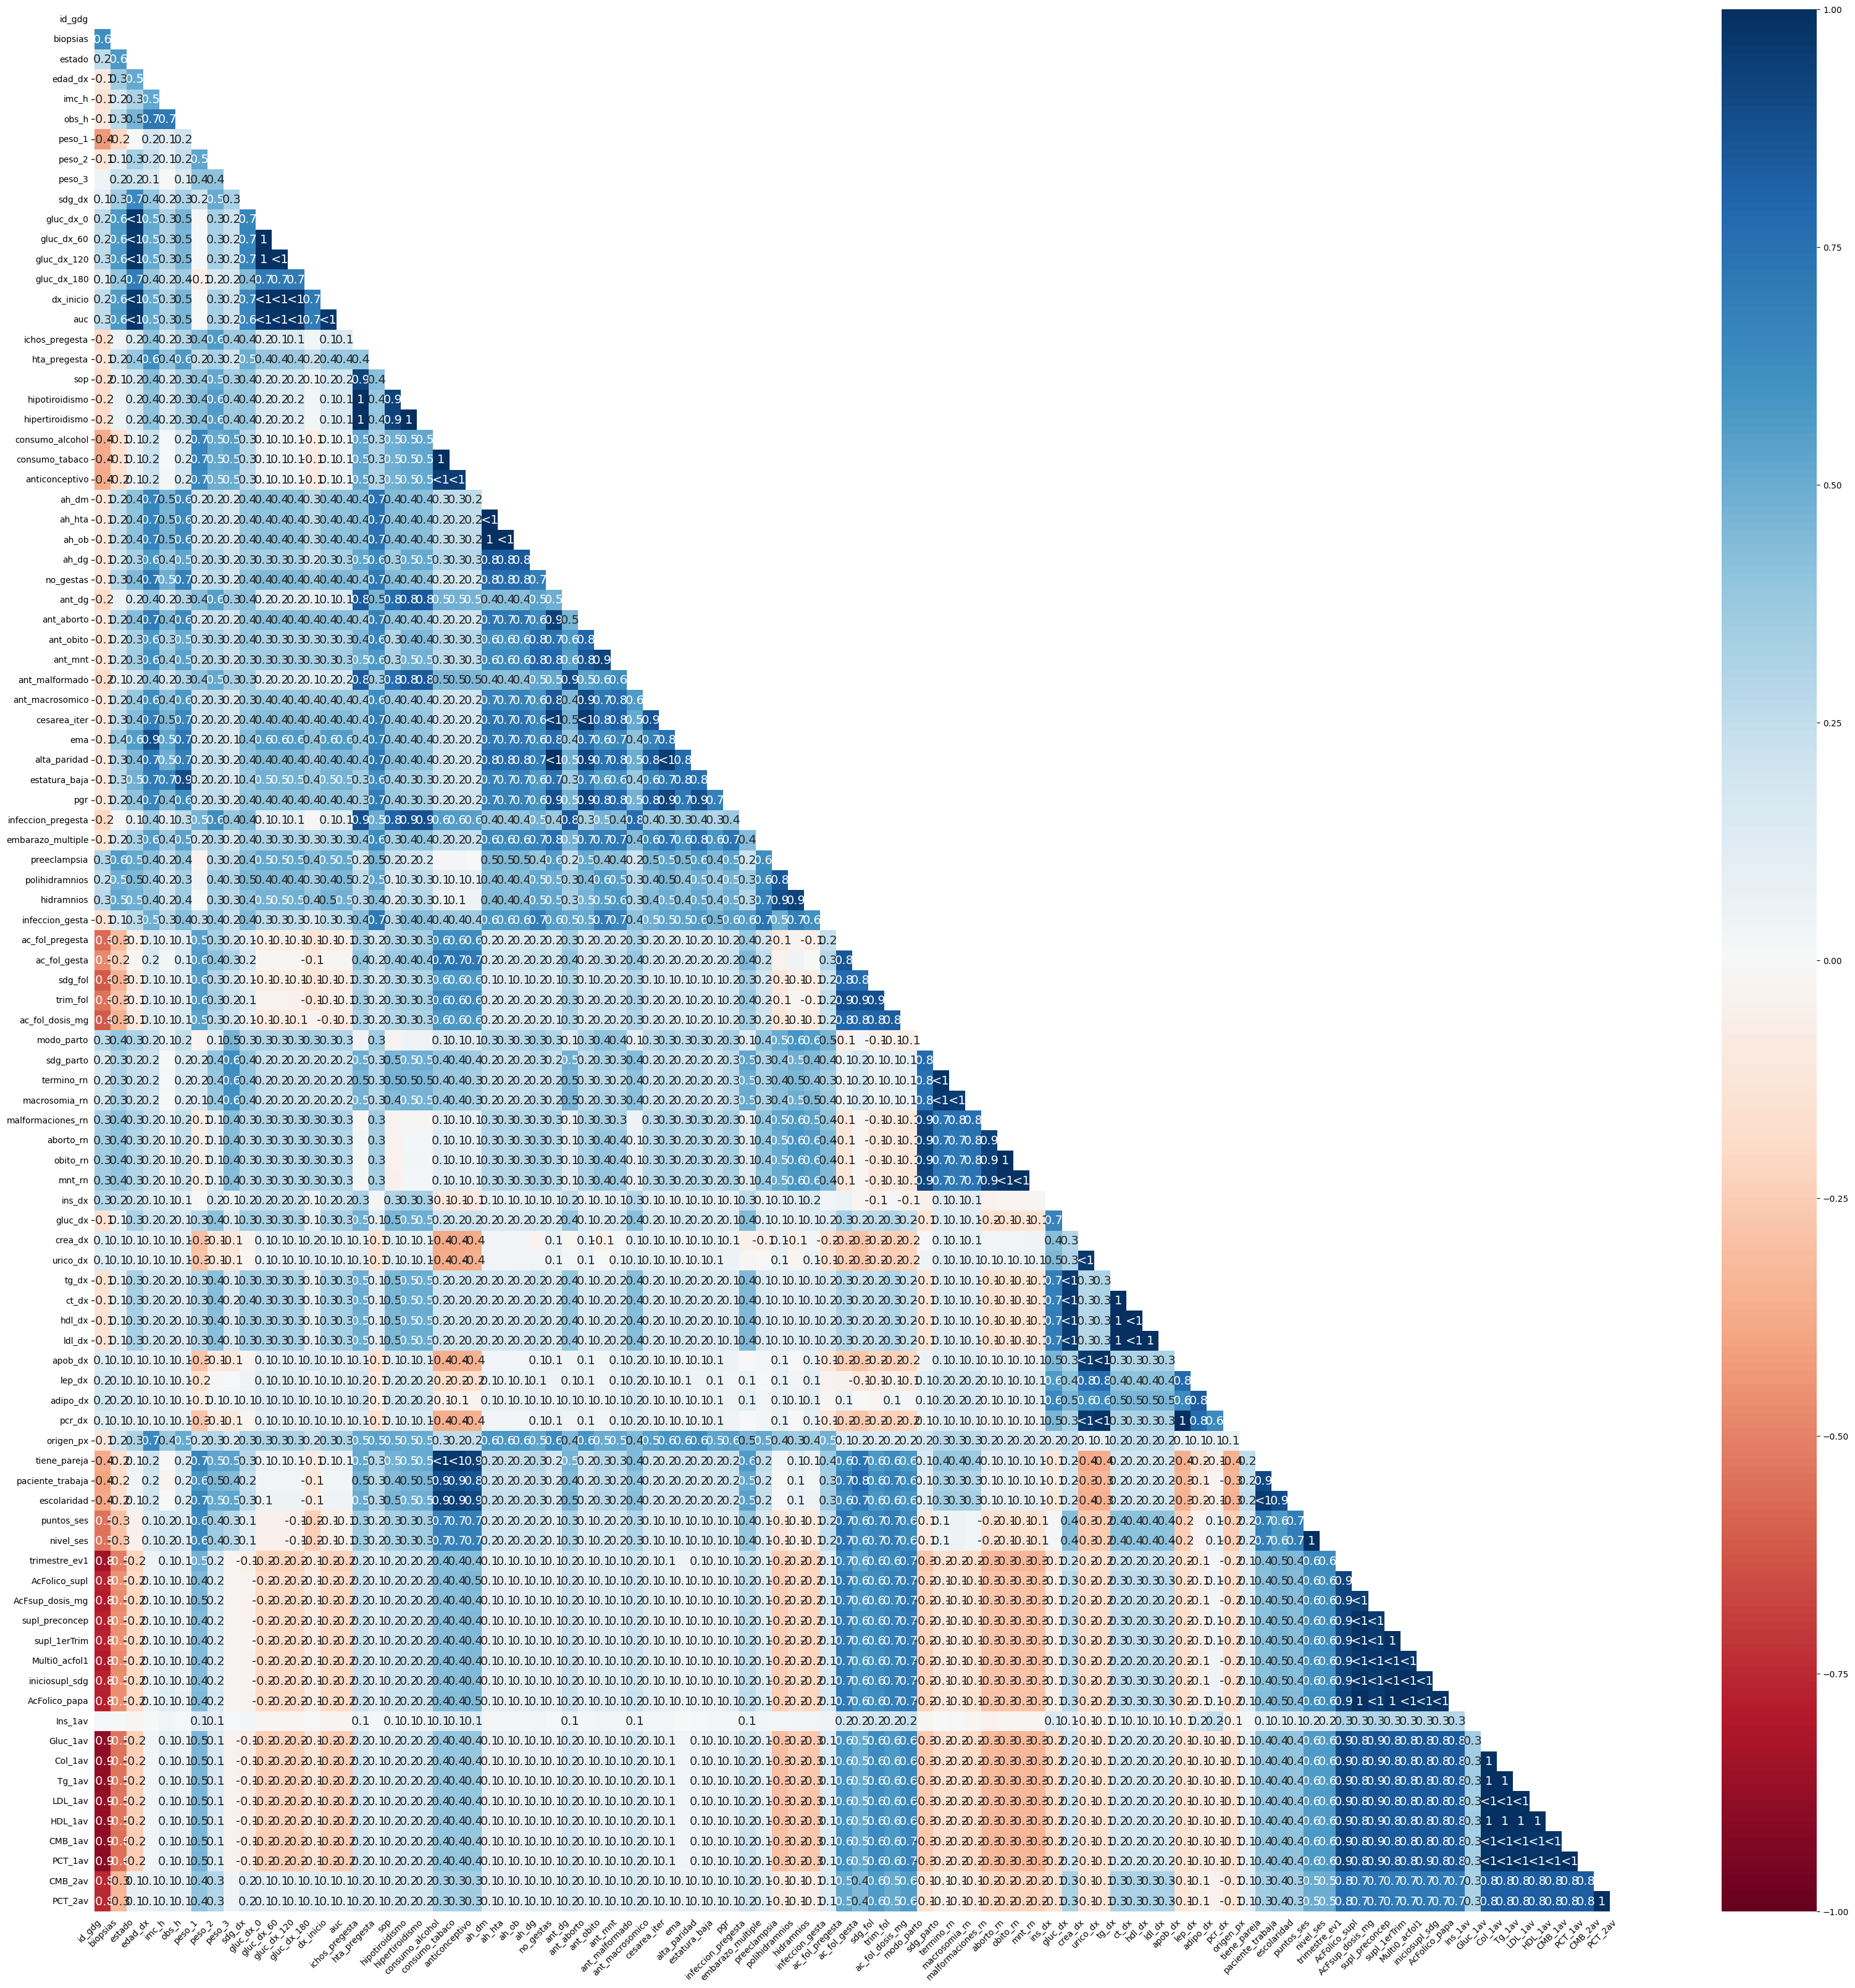

In [34]:
# Missingness Map

import missingno as msno
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40, 40))  # Adjust size as needed

# Create the heatmap
msno.heatmap(df1, ax=ax)

# Reduce font size of tick labels (optional)
ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust size as needed

plt.show()

Esta gráfica nos permite identificar zonas de alta correlación con presencia y ausencia de variables.

Por ejemplo, la zona de variables ac_fol_pregesta, ac_fol_gesta, sdg_fol, trim_fol y ac_fol_dosis_mg tiene una ligera correlación positiva en presencia de biopsias.

Misma conducta podemos observarla con las variables trimestre_ev1, acFolico_supl, AcFolico_Marca, AcFsup_dosis_mg, supl_preconcep, supl_1erTrim, Multi0_acfol1, inicisupl_sdg, AcFolico_papa, Gluc_1av, Col_1av, Tg_1av, LDL_1av, HDL_1av, CMB_1av, PCT_1av.

También encontramos correlaciones positivas en presencia de datos con las siguientes pares de variables:

[trimestre_ev1, acFolico_supl, AcFolico_Marca, AcFsup_dosis_mg, supl_preconcep, supl_1erTrim, Multi0_acfol1, inicisupl_sdg, AcFolico_papa, Gluc_1av, Col_1av, Tg_1av, LDL_1av, HDL_1av, CMB_1av, PCT_1av]

<center>vs</center>

[modo_parto, sdg_parto, termino_rn (candidata a variable dependiente), macromosima_rn (candidata a variable dependiente), malformaciones_rn, aborto_rn, obito_rn, mnt_rn, ins_dx, crea_dx, urico_dx, aprob_dx, lep_dx, pcr_dx]

Estos últimos siendo parte del conjunto de marcadores bioquímicos.


# Dendrograma

Este gráfico proporciona información en forma de árbol generado mediante agrupación jerárquica y agrupa columnas que tienen fuertes correlaciones en nulidad.

Si varias columnas se agrupan en el nivel cero, esto significa que la presencia de nulos en una de esas columnas está directamente relacionada con la presencia o ausencia de nulos en las demás columnas. Cuanto más separadas estén las columnas en el árbol, menos probable será que los valores nulos estén correlacionados entre las columnas.



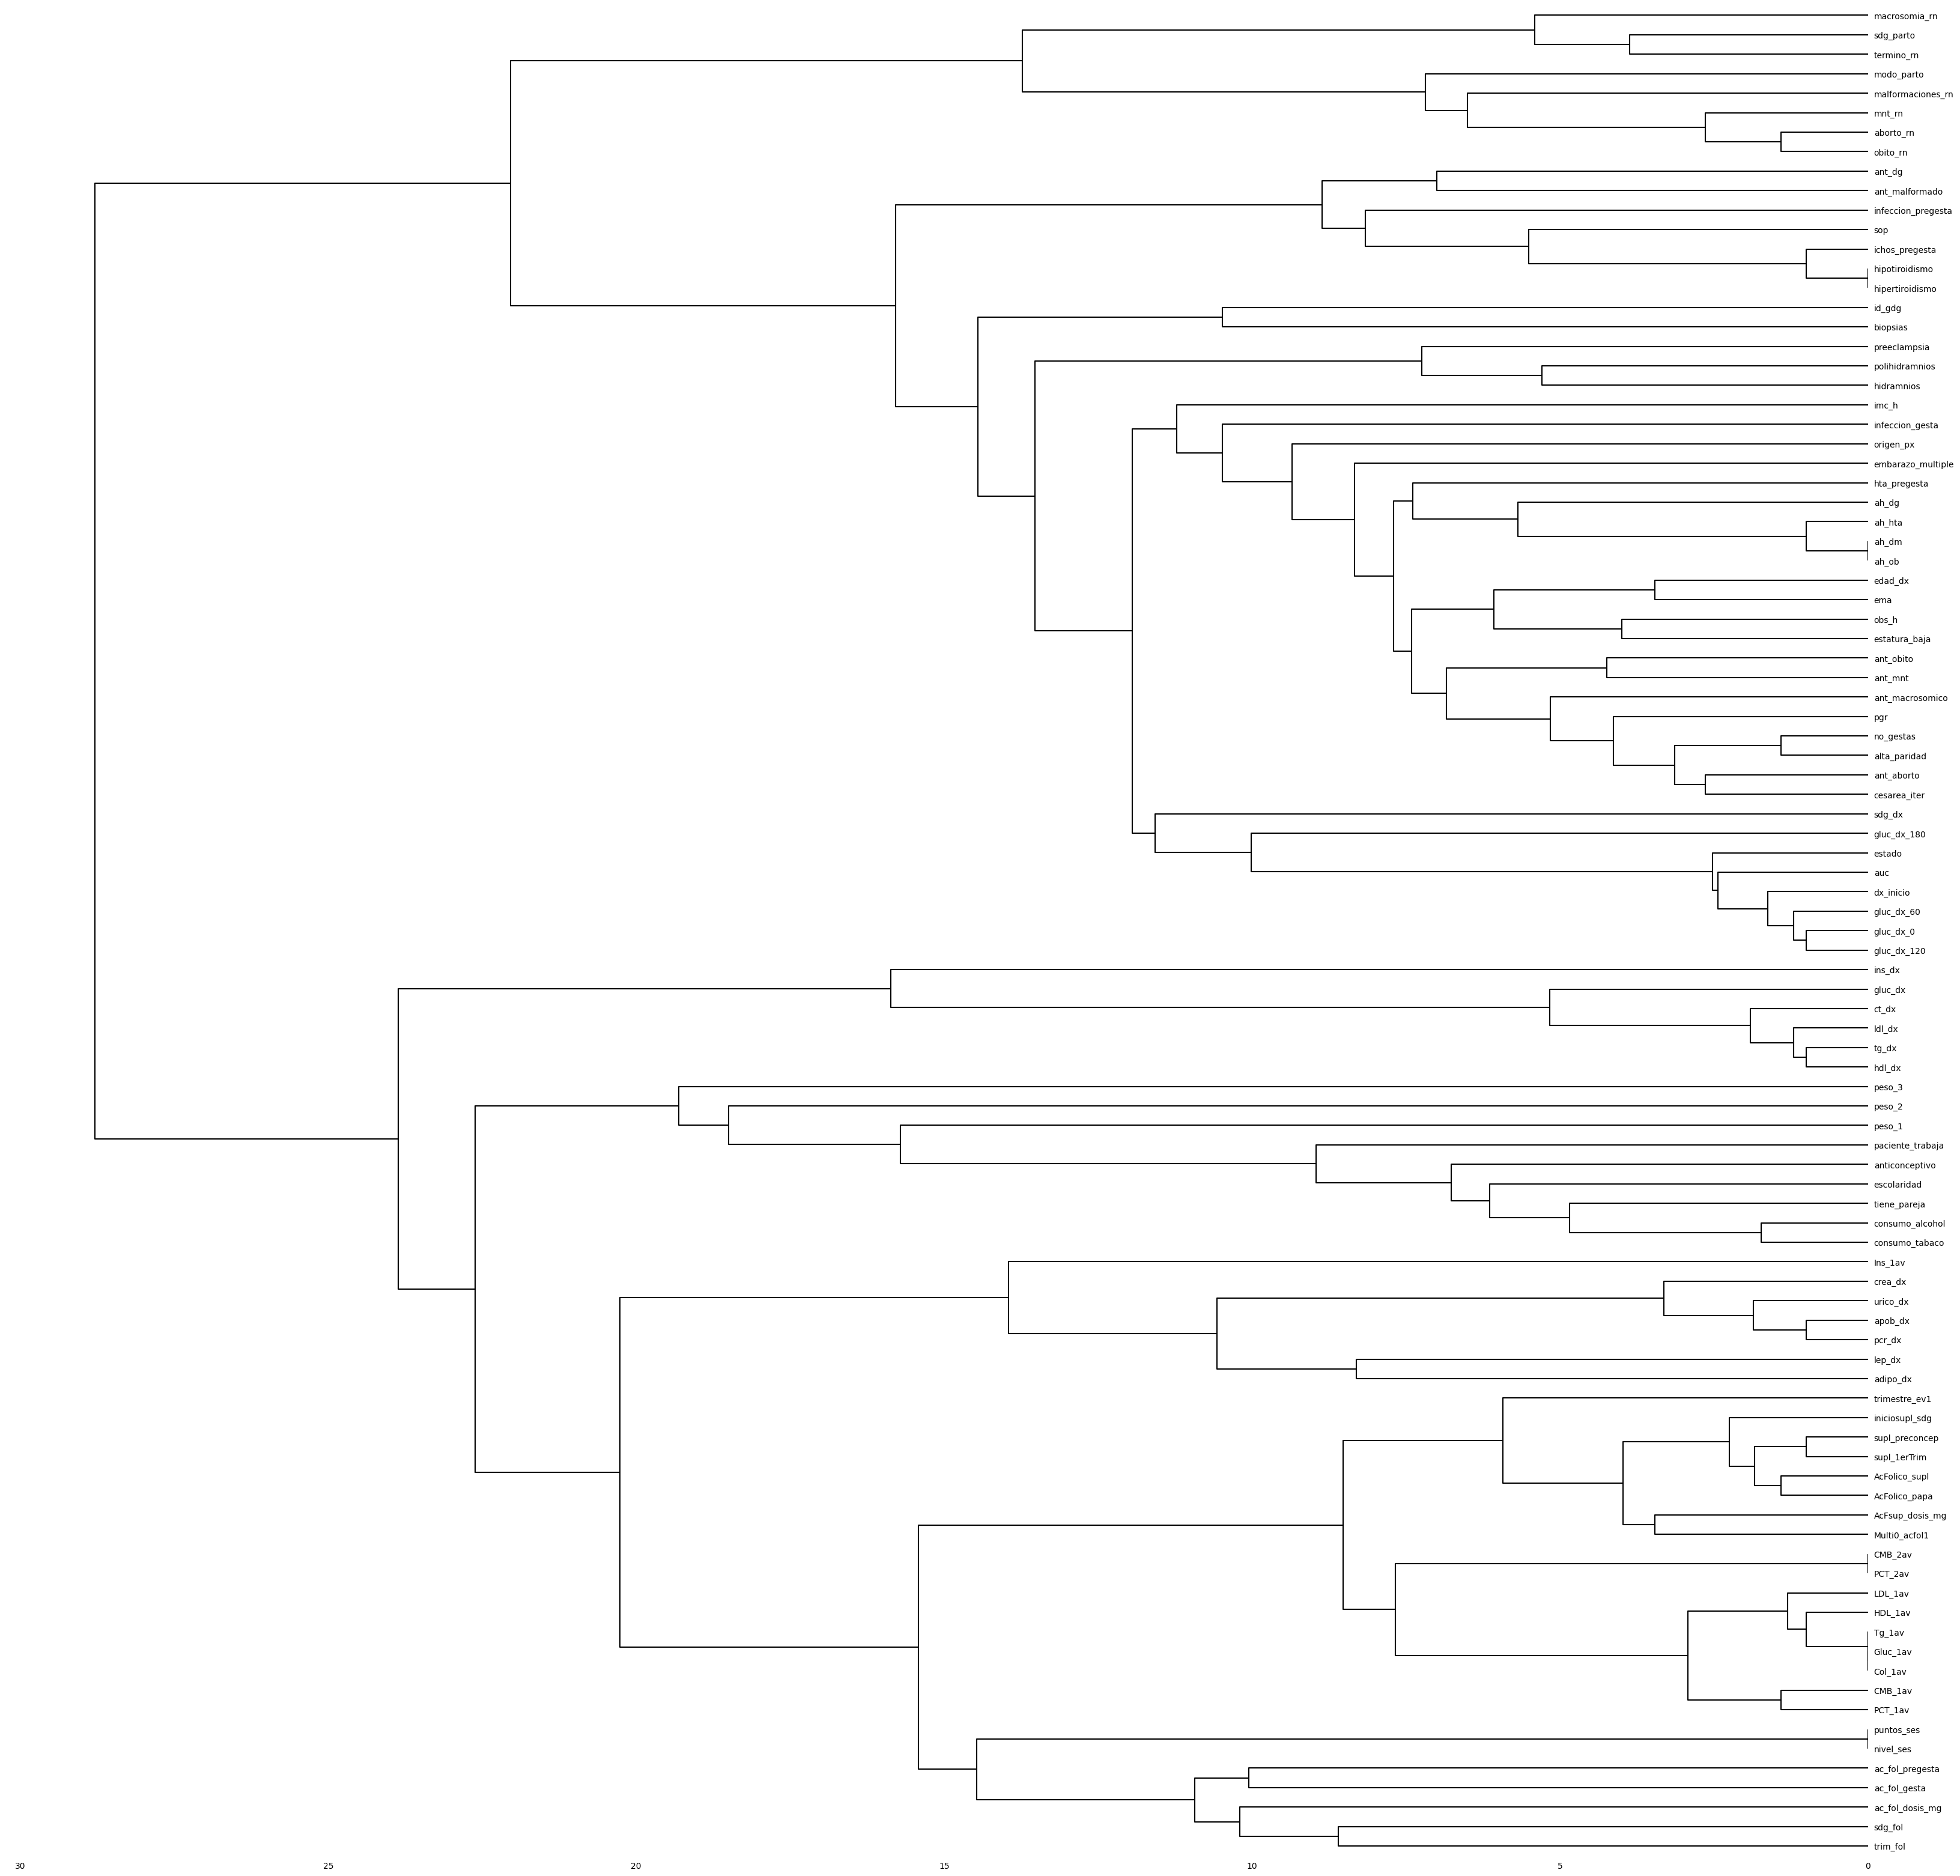

In [35]:
fig, ax = plt.subplots(figsize=(40, 40))

msno.dendrogram(df1, ax=ax)

ax.tick_params(axis='both', which='major', labelsize=10)
plt.show()

Como se mencionó, este gráfico nos permite entender diferentes grupos de columnas que guardan relación con su presencia o no de datos. Por ejemplo, el grupo de preeclampsia, polihidramnios e hidramnios están fuertemente correlacionados en nulidad. La presencia de una variable en este grupo indica que existe una alta probabilidad de la existencia de otra.

Esto es importante porque gracias a esta gráfica podemos determinar grupos de variables y determinar qué técnica de imputación de datos podemos realizar. Es decir, todo lo que esté relacionado con la glucosa, puede ser tratado con la misma técnica de imputación.

Inclusive podemos identificar clusters de columnas a nivel cero como obs_h, talla, estatura_baja, ev_1ertrim, ev_dieta, edad_dx y ema que indican tener una gran densidad de dato.

# Densidad

Además de los análisis anteriores, evaluamos el nivel de densidad de las características. Es decir:

$$ Porosidad = TotalCeldasVacias / TotalFilas
$$
​

Esto se calcula a continuación:

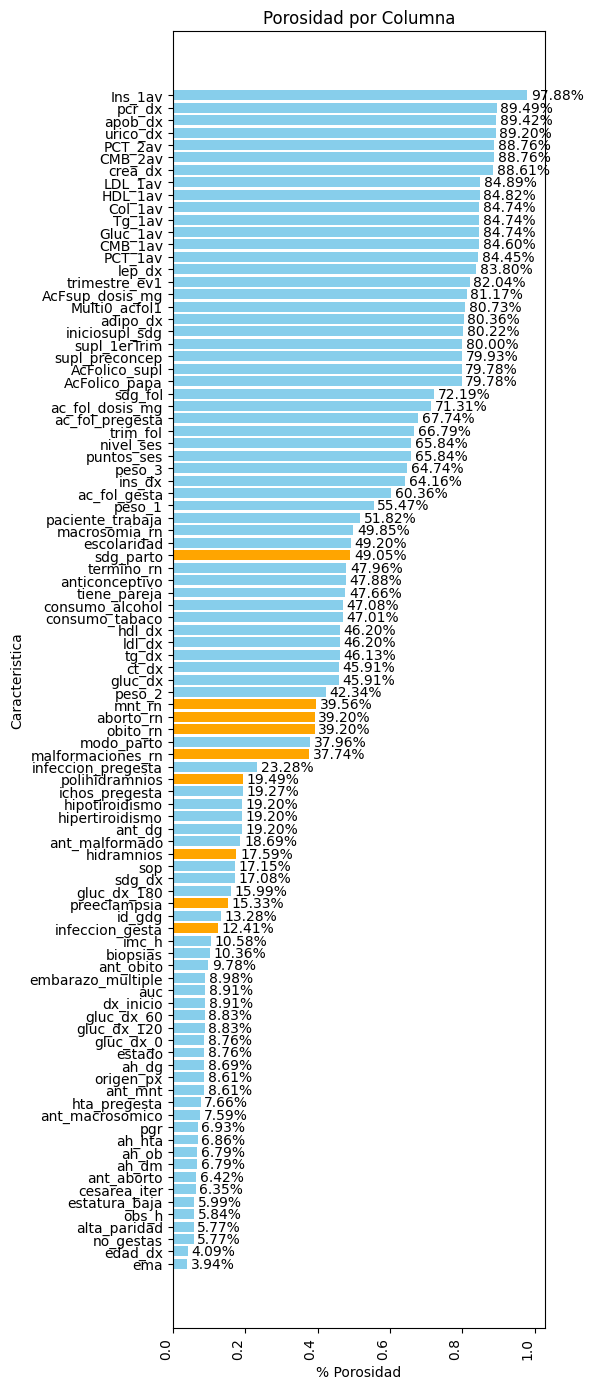

In [36]:
from IPython.display import display, HTML

# Adjust the max width of output cells to fit the screen
display(HTML("<style>.container { width:100% !important; }</style>"))

# Hide the vertical scroll bar for output cells
display(HTML("<style>.output { overflow-y: hidden; }</style>"))


# Graficamos la porosidad inicial
getPorosidad(df1)

Las columnas en naranja son las variables que utilizaremos para el cálculo de la variable dependiente  `IndexMorbilidad`

Gráfica de quintiles para determinar qué variables podemos recomendar eliminar.

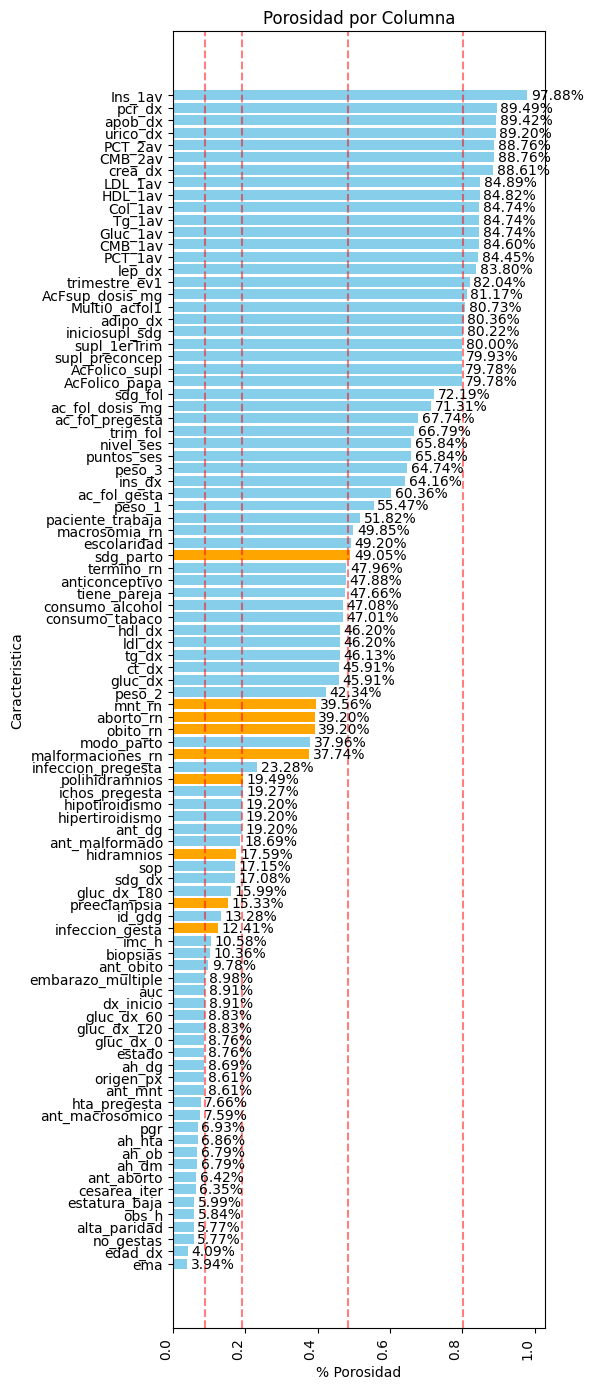

In [37]:
getPorosidadQuintiles(df1)

Las siguientes variables que se encuentran en el último quintil, serán recomendada eliminarlas de la matriz de datos:


In [38]:
getVariablesUltimoQuintil(df1)

variables_ultimo_quintil = ['adipo_dx', 'Multi0_acfol1', 'AcFsup_dosis_mg', 'trimestre_ev1', 'lep_dx', 'PCT_1av', 'CMB_1av', 'Gluc_1av', 'Tg_1av', 'Col_1av', 'HDL_1av',
 'LDL_1av', 'crea_dx', 'CMB_2av', 'PCT_2av', 'urico_dx', 'apob_dx', 'pcr_dx', 'Ins_1av']


df1.drop(columns =variables_ultimo_quintil, inplace=True)




Podemos observar que la variable dependiente candidata `sdg_parto` tiene un 49.5% de densidad. Esto no permitirá tener un modelo fiable, ya que, si optamos por la eliminación de filas sin variable dependiente, solo tendríamos **1,188 * (1-0.495) = 599** (redondeado) observaciones.

Por lo tanto, crearemos una variable dependiente (en la fase Ingeniería de Características) llamada `IndexMorbilidad` considerando los siguientes factores de morbilidad de la base de datos:


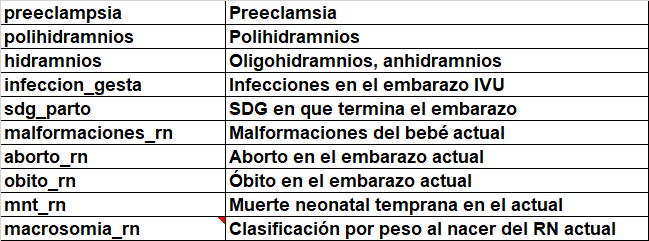

# Preprocesamiento

Realizaremos las siguientes acciones:
- Data imputation mediante el método multivariate feature imputation
- Generación de variable dependiente mediante la creación de un índice de morbilidades.

Además, eliminaremos las características que se encuentran en el último quintil de porosidad, esto previamente consultado con el equipo de investigación.


# Data Imputation

Utilizaremos el método Multivariate feature imputation que modela cada característica con valores perdidos en función de otras características y utiliza esa estimación para la imputación.

Lo hace de forma iterativa: en cada paso, una columna de características se designa como salida y y las demás columnas de características se tratan como entradas X. Se ajusta un regresor en (X, y) para y conocido.

In [51]:
# Lo primero es sustituir los NaN's por celdas vacías para diferenciar limpiamente categóricas de numéricas.
# Un valor NaN confundirá una variable numérica con un vector = [0, 1, 'NA', null] en categórica

# Solo la variable macrosomia_rn es categórica

df_wo_spaces = df1.fillna('')
df_cleaned = df_wo_spaces.replace('NA', '')
df_cleaned = df_cleaned.replace('Na', '')
df_cleaned = df_cleaned.replace('na', '')

# Encontramos typos en la base. Colocaron 'o' (vocal o) en lugar de 0
# Será necesario reemplazar
df_cleaned = df_cleaned.replace('o', 0)
# Siguiente paso: identificar variables dicotómicas para ejecutar la correcta estrategia de imputación

binary_features = identify_binary(df_cleaned.copy())  # Use a copy to avoid modifying original data
all_cols = set(df_cleaned.columns)


cols_to_remove_from_numeric =["macrosomia_rn", "anticonceptivo", "id_gdg", "origen_px"]

numeric_features = [x for x in all_cols if x not in binary_features]
numeric_features = [x for x in numeric_features if x not in cols_to_remove_from_numeric]

categorical_features  =["macrosomia_rn", "anticonceptivo"]

#df_cleaned[binary_columns] = df_cleaned[binary_columns].astype(bool)

print(f"Columnas dicotómicas: {binary_features}")
print(f"Columnas numéricas: {numeric_features}")
print(f"Columnas categorica: {categorical_features}")

df_cleaned['macrosomia_rn'] = df_cleaned['macrosomia_rn'].astype(str)

df_cleaned.to_csv("salida.csv")


Columnas dicotómicas: ['biopsias', 'obs_h', 'ichos_pregesta', 'hta_pregesta', 'sop', 'hipotiroidismo', 'hipertiroidismo', 'consumo_alcohol', 'consumo_tabaco', 'ah_dm', 'ah_hta', 'ah_ob', 'ah_dg', 'ant_dg', 'ant_obito', 'ant_mnt', 'ant_malformado', 'ant_macrosomico', 'cesarea_iter', 'ema', 'estatura_baja', 'pgr', 'infeccion_pregesta', 'embarazo_multiple', 'preeclampsia', 'polihidramnios', 'hidramnios', 'infeccion_gesta', 'ac_fol_pregesta', 'malformaciones_rn', 'aborto_rn', 'obito_rn', 'mnt_rn', 'tiene_pareja', 'paciente_trabaja', 'AcFolico_supl', 'supl_preconcep', 'AcFolico_papa']
Columnas numéricas: ['lep_dx', 'urico_dx', 'HDL_1av', 'iniciosupl_sdg', 'termino_rn', 'tg_dx', 'Tg_1av', 'CMB_2av', 'ins_dx', 'Gluc_1av', 'sdg_fol', 'ac_fol_gesta', 'auc', 'adipo_dx', 'gluc_dx_0', 'Col_1av', 'trim_fol', 'PCT_1av', 'ac_fol_dosis_mg', 'puntos_ses', 'peso_3', 'no_gestas', 'sdg_parto', 'peso_2', 'supl_1erTrim', 'CMB_1av', 'modo_parto', 'gluc_dx_60', 'imc_h', 'alta_paridad', 'crea_dx', 'trimestre_e

Eliminaremos las variables `id_gdg` y `origen_px` pues son identificadores. No es necesario imputarlos.

Ahora, será necesario aplicar un algoritmo de imputación, en este caso hemos optado por Multivariate feature imputation

# Data imputacion

In [40]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

df_cleaned.replace('', np.nan, inplace=True)

# Create pipeline for preprocessing
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with mode
      # Convert to binary
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Impute missing values with mean
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))  # Impute missing values with mode
])

preprocessor = ColumnTransformer(
    transformers=[
        ('binary', binary_transformer, binary_features),
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
pipeline.fit(df_cleaned)

# Fit and transform the data
transformed_data = pipeline.transform(df_cleaned)

# Get feature names
binary_feature_names = binary_features
numeric_feature_names = numeric_features
categorical_feature_names = categorical_features
feature_names = binary_feature_names + numeric_feature_names + categorical_feature_names

transformed_df = pd.DataFrame(transformed_data, columns=feature_names)
print(transformed_df)

transformed_df.to_csv("final.csv")


     biopsias obs_h ichos_pregesta hta_pregesta  sop hipotiroidismo  \
0         0.0   0.0            0.0          0.0  0.0            0.0   
1         0.0   0.0            0.0          1.0  0.0            0.0   
2         0.0   1.0            0.0          1.0  0.0            0.0   
3         0.0   0.0            0.0          1.0  0.0            0.0   
4         0.0   1.0            0.0          1.0  0.0            0.0   
...       ...   ...            ...          ...  ...            ...   
1365      0.0   0.0            0.0          0.0  0.0            0.0   
1366      0.0   1.0            0.0          0.0  0.0            0.0   
1367      0.0   0.0            0.0          0.0  0.0            0.0   
1368      0.0   0.0            0.0          0.0  0.0            0.0   
1369      0.0   0.0            0.0          0.0  0.0            0.0   

     hipertiroidismo consumo_alcohol consumo_tabaco ah_dm ah_hta ah_ob ah_dg  \
0                0.0             0.0            0.0   1.0    1.0   

Hemos realizado la imputación de datos, comprobemos.



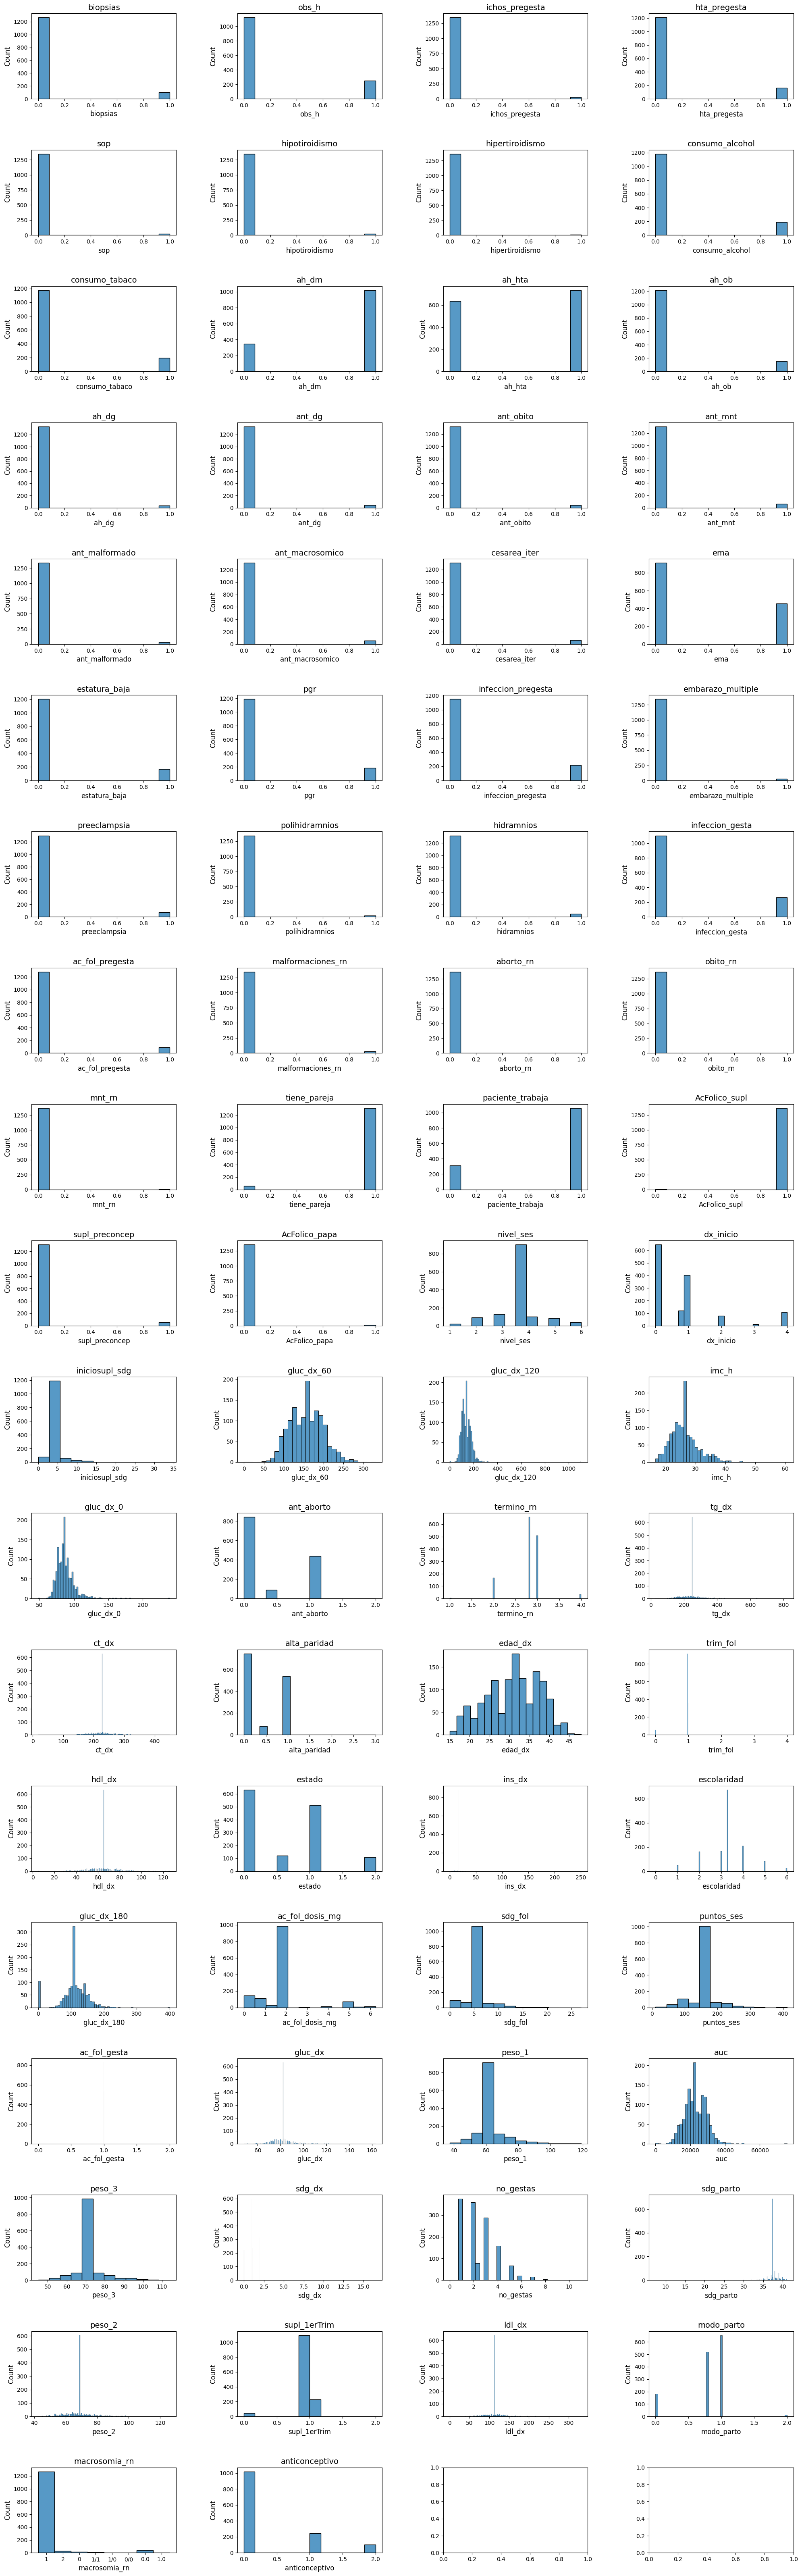

In [41]:
num_plots = min(len(transformed_df.columns), 100)

fig, axes = plt.subplots(int(np.ceil(num_plots / 4)), 4, figsize=(20, 64))
ax = axes.flatten()

for i, col in enumerate(transformed_df.columns):
    sns.histplot(transformed_df[col], ax=ax[i])
    ax[i].set_title(col, fontsize=14)
    ax[i].set_xlabel(ax[i].get_xlabel(), fontsize=12)
    ax[i].set_ylabel(ax[i].get_ylabel(), fontsize=12)
    plt.ticklabel_format(style='plain', axis='both')



fig.tight_layout(w_pad=6, h_pad=4) # change padding
plt.show()

En un vistazo a las gráficas de distribución se puede observar que ya tenemos datos completos, nuestra imputación en las variables binarias fue exitosa pues tenemos gráficas con valores de 1 o 0.

# Evaluación de porosidad

En este código, revisamos cuántos valores nulos tenemos:



In [42]:
null_counts_by_column = transformed_df.isnull().sum(axis=0)
null_counts_by_column

biopsias          0
obs_h             0
ichos_pregesta    0
hta_pregesta      0
sop               0
                 ..
supl_1erTrim      0
ldl_dx            0
modo_parto        0
macrosomia_rn     0
anticonceptivo    0
Length: 74, dtype: int64

Ahora la gráfica para verificar:

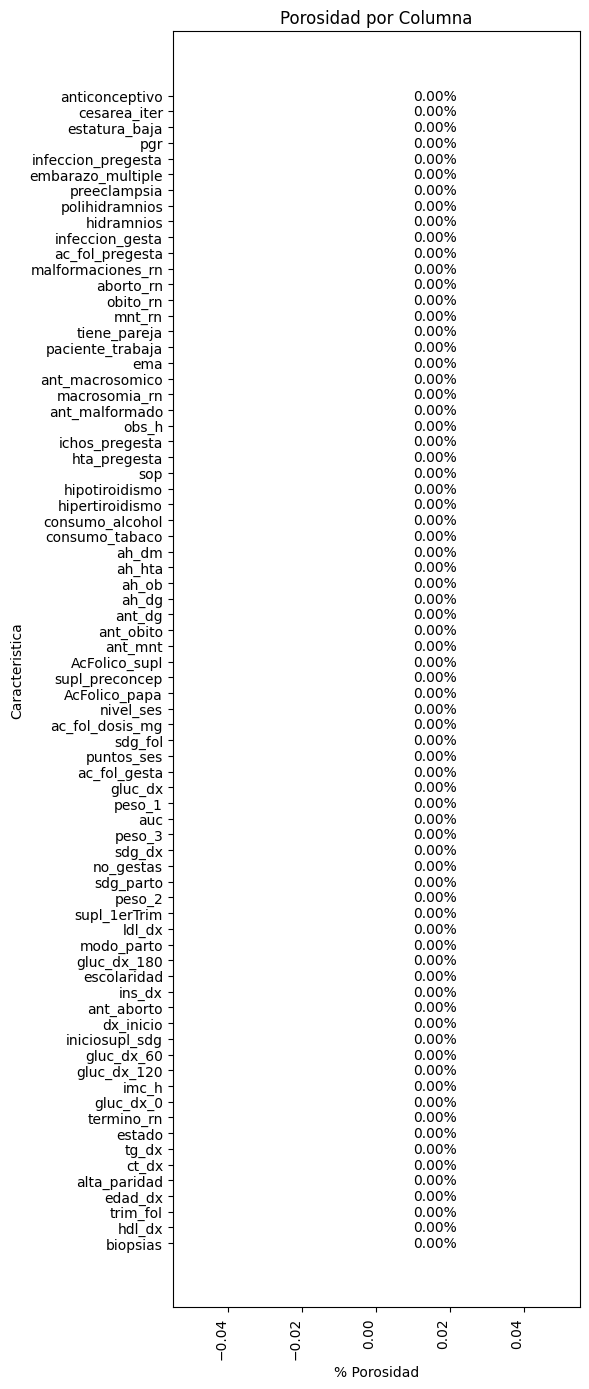

In [43]:
getPorosidad(transformed_df)

# Análisis bivariado

A continuación, realizaremos el análisis bivariado para identificar relaciones interesantes como correlaciones entre variables. El objetivo será eliminar dichas variahbles o aplicar alguna transformación para generar un entrenamiento más rápido.



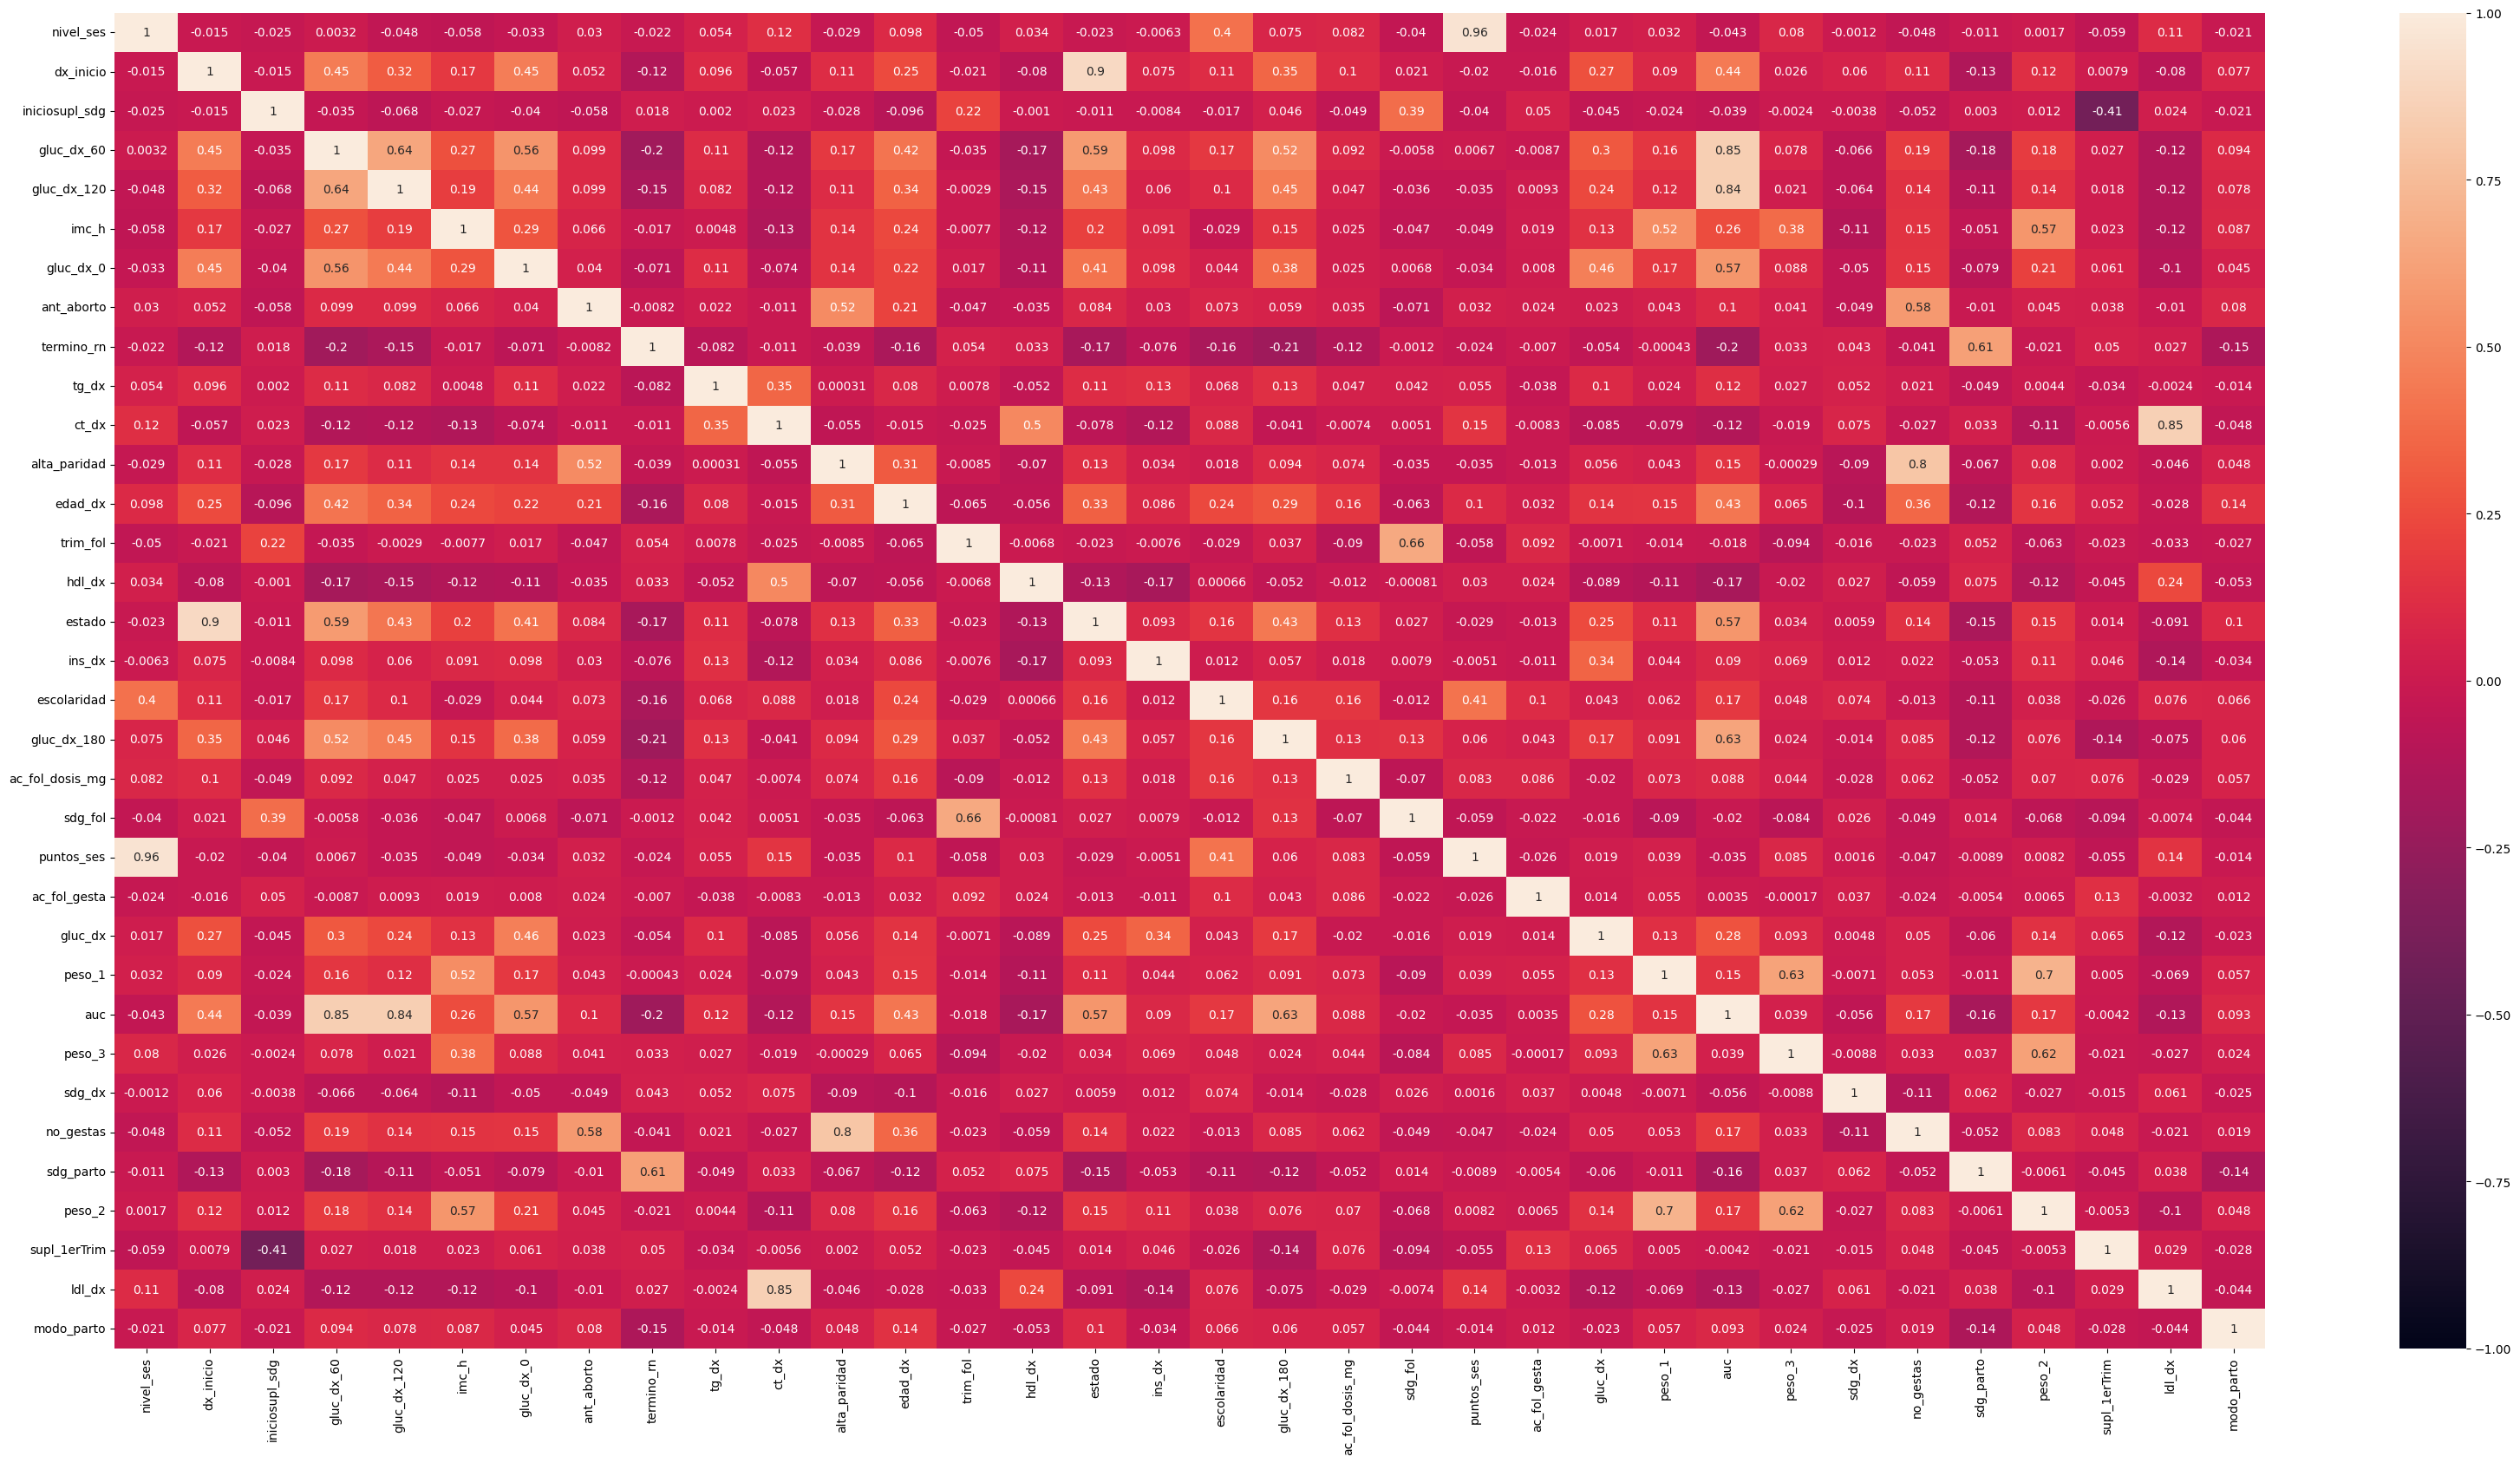

In [44]:
# Para una mejor visualización de las correlaciones, usaremos un heatmap
plt.figure(figsize=(40, 20))
sns.heatmap(transformed_df[numeric_features].corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

# Observaciones análisis bivariado.

- Peso_1, Peso_2 y Peso_3 tienen una correlación positiva con el imc_h
- Existe una correlación de ct_dx y tg_dx
- Encontramos una correlación positiva fuerte con ct_dx e idl_dx
- Peso_3 está fuertemente correlacionada con Peso_1
- También Peso_2 tiene una correlación positiva con Peso_1
- Gluc_dx_60 tiene una correlación positiva con auc
- Gluc_dx_120 guarda una correlación positiva con auc
- Gluc_d_x 0 con auc
- Gluc_dx_180 con auc
- Las variables relacionadas con glucosa_0_dx, 60_dx, 120_dx y 180_dx guarda correlaciones positivas
- iniciosupl_sdg también tiene una correlación positiva con sdg_fol
-idl_dx está correlacionada positivamente con ct_dx
- nivel_ses con puntos_ses también están fuertemente correlacionada positivamente

En general, un grupo de variables altamente correlacionadas no traerán información adicional al modelo e incrementarán la complejidad del algoritmo, esto aumentará el riesgo de comenter errores. Por tal motivo, se realizará una transformación del dataset con PCA para combatir la gran dimensionalidad del dataframe curado.

Ahora hemos curado el dataset para trabajarlo con ingeniería de datos.

# Detección de Outliers

A continuación, ejecutaremos código para detección de outliers


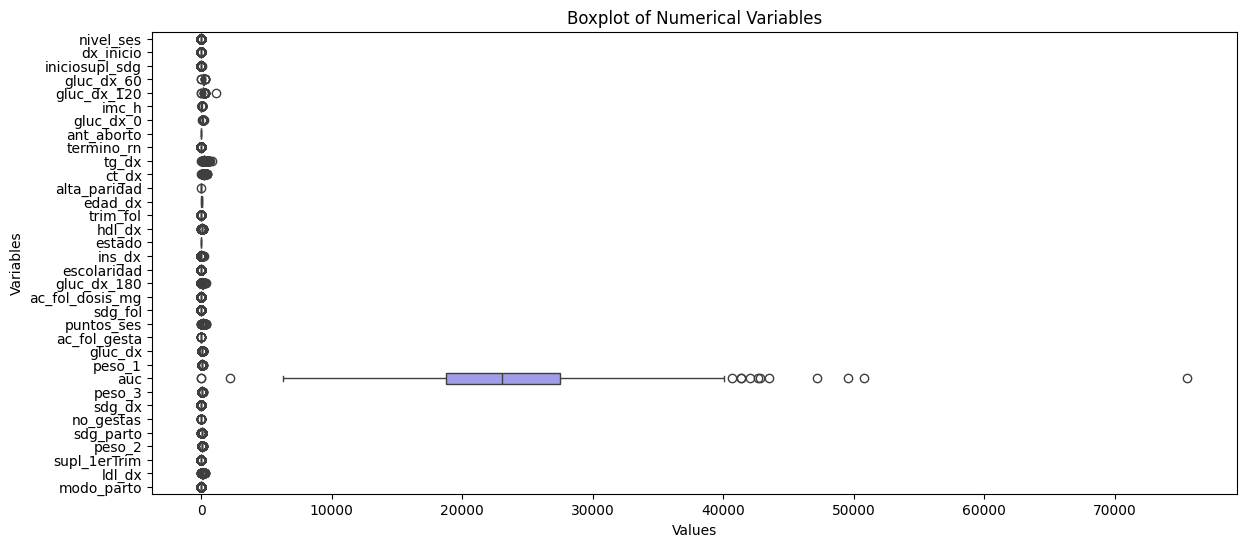

In [45]:

dfOutliers = transformed_df[numeric_features]
outliers_IQR = detect_outliers_iqr(dfOutliers)

# Create boxplot for each numerical variable
plt.figure(figsize=(14, 6))
sns.boxplot(data=dfOutliers, orient='h')
plt.title("Boxplot of Numerical Variables")
plt.xlabel("Values")
plt.ylabel("Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Observamos que la variable AUC tiene un outlier, realizaremos nuevamente el análisis eliminando esta variable de la gráfica (no del dataframe) solo para efectos de visualización.

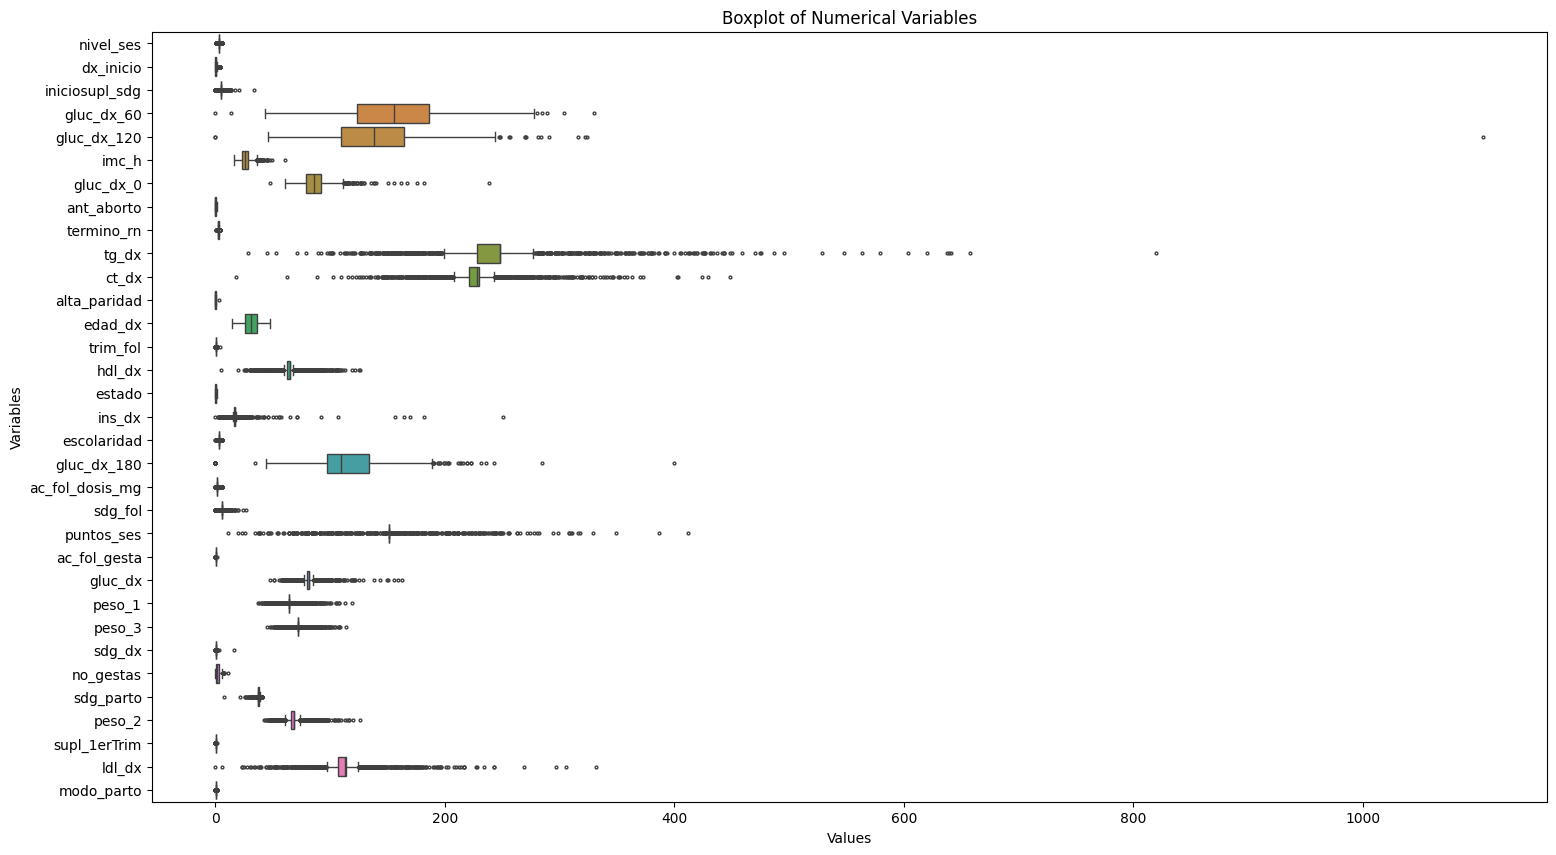

In [46]:
del dfOutliers["auc"]

plt.figure(figsize=(18, 10))
sns.boxplot(data=dfOutliers, orient='h', fliersize=2)
plt.title("Boxplot of Numerical Variables")
plt.xlabel("Values")
plt.ylabel("Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Ahora sí es claro saber qué variables tienen outliers. Estos los trataremos con transformaciones box-cox debido a que observamos que existen variables como tg_dx que tiene sesgos importantes. Las transformaciones cox-box permiten reducir estas asimetrías de manera efectiva. Considerar que la metodología CRISP nos permite iterar entre fases con lo cual podemos experimentar con algoritmos que no son muy sensibles a los outliers como Random Forest.

# Selección de variable dependiente

En conjunto con el equipo médico, se ha decidido que la variable dependiente será llamada  `EscalaRiesgo` compuesta por la suma de presencias en cada una de las siguientes variables:

- malformaciones_rn
- aborto_rn
- obito_rn
- mnt_rn
- preeclampsia
- polihidramnios
- hidramnios
- infeccion_gesta
- semanas de gestación del parto (prematurez)

Es decir, `EscalaRiesgo` tendrá la siguiente escala:

- **Clase A**. Si contiene 3 a 4 puntos
- **Clase B**. Si contiene entre 1 y 2 puntos
- **Clase C**. Si no contiene puntos

La creación de la variable dependiente estará en la fase de **ingeniería de características**

Ahora, reintegraremos los identificadores y los estados de origen de la paciente

In [52]:
transformed_df.reset_index(drop=True, inplace=True)
dfIds.reset_index(drop=True, inplace=True)


df_result = pd.concat([dfIds, transformed_df], axis=1)

df_result.head()

df_result.to_csv("dataset_proxima_fase.csv", encoding='utf-8', index=False)

# Conclusiones

In [48]:
# Aid code to create conclusions and final thoughts
#len(df_result.columns)
#len(binary_feature_names)


### Después de realizar el análisis exploratorio de los datos tenemos 76 variables de las cuales una sola es categórica por la naturaleza del dato (macrosomia_rn) **34 son númericas y 38 binarias**. Integramos **2 variables de identificación para tener llaves en los registros:`id_gdg` y `origen_px` que nos permitirá realizar análisis estadísticos geográficos.

### Este ejercicio nos permitió entender la naturaleza del dataset original; el análisis de porosidad de variables nos permitió identificar características con muy poca data. Cotejamos esta información con el equipo médico para realizar la eliminación de estas características. También identificamos algunos typos en la captura que, después de una inspección ocular, procedimos a su reemplazo del dato correcto.

### El dataset contiene una mayoría de variables numéricas, esto nos permite entender mejor correlaciones entre variables e identificar aquellas que guardan correlaciones positivas altas. Sabemos que variables con correlaciones positivas debemos eliminarlas o transformarlas para evitar multicolinealidad. Ya hemos identificado dichas variables y mediante PCA realizaremos la reducción de la dimensionalidad.

### Un punto importante es que la variable dependiente no es orgánica, será sintética y será producto de la creación de un índice de suma de morbilidades de 8 características indicadas por el cuerpo médico. De esta manera, el índice lo transformaremos en diferentes clases de acuerdo al valor calculado y trataremos este dataset con un problema de aprendizaje supervisado con una variable dependiente sintética de clasificación en 3 niveles: A (riesgo superior), B (riesgo medio) y C (riesgo bajo).


